# ARIMA Model for the clean energy data

In [3]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
clean_energy_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Clean_Energy_Index.csv"
clean_energy_index = pd.read_csv(clean_energy_url)
clean_energy_index = clean_energy_index.rename(columns={"Clean_Energy": "Index"})
clean_energy_index["Date"] = pd.to_datetime(clean_energy_index['Date'])
clean_energy_index = clean_energy_index.set_index("Date") 

clean_energy_index.tail()

,Index
Date,
2021-09-20,1396.38
2021-09-21,1410.85
2021-09-22,1429.32
2021-09-23,1444.49
2021-09-24,1418.43


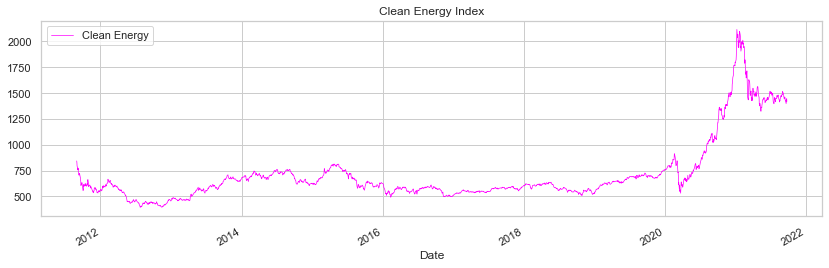

In [6]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
clean_energy_index['Index'].plot(linewidth=0.7, color="magenta", label="Clean Energy")
plt.title("Clean Energy Index")
plt.legend()
# plt.savefig('plots/clean_all.jpg');

In [7]:
# Until 1 Mar 2020: Before Covid; after 1 Mar 2021 After Covid; after 1 Sep 2021 test data
clean_energy_before = pd.DataFrame(clean_energy_index.loc[:"2020-03-01"])
clean_energy_after = pd.DataFrame(clean_energy_index.loc["2021-03-01":"2021-08-31"])
clean_energy_test = pd.DataFrame(clean_energy_index.loc["2021-09-01":])

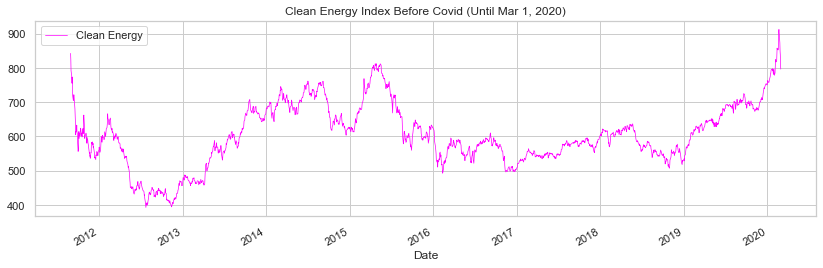

In [8]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
clean_energy_before['Index'].plot(linewidth=0.7, color="magenta", label="Clean Energy")
plt.title("Clean Energy Index Before Covid (Until Mar 1, 2020)")
plt.legend()
# plt.savefig('DS4A/plots/clean_before.jpg');

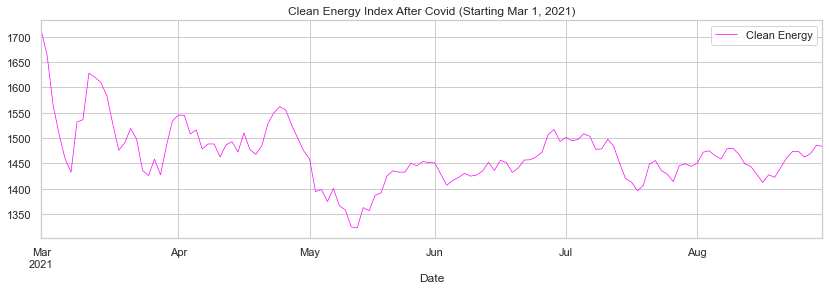

In [9]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
clean_energy_after['Index'].plot(linewidth=0.7, color="magenta", label="Clean Energy")
plt.title("Clean Energy Index After Covid (Starting Mar 1, 2021)")
plt.legend()
# plt.savefig('DS4A/plots/clean_after.jpg');

In [10]:
print("Clean Energy mean before COVID: ", round(clean_energy_before["Index"].mean(),2), "Clean Energy mean before COVID: ", round(clean_energy_after["Index"].mean(),2))

Clean Energy mean before COVID:  603.34 Clean Energy mean before COVID:  1467.16


## Fit arima to the after covid

In [11]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(clean_energy_after["Index"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#From here we understand no differencing is needed

ADF Statistic: -4.518962
p-value: 0.000182


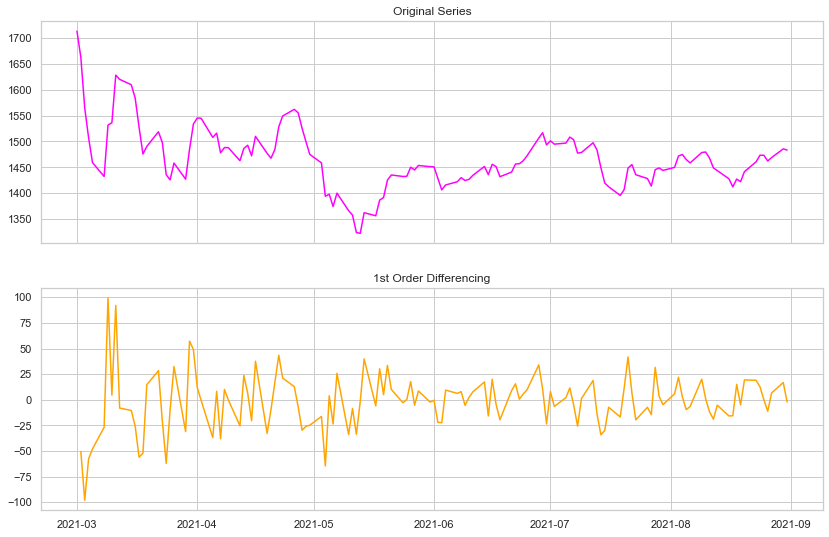

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set(rc={'figure.figsize':(14, 9)})
sns.set_theme(style="whitegrid")
# Original Series
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(clean_energy_after.Index, c="magenta"); 
axes[0].set_title('Original Series')
# plot_acf(clean_energy_before.Index, ax=axes[0, 1])

# 1st Differencing
axes[1].plot(clean_energy_after.Index.diff(), color = "orange"); axes[1].set_title('1st Order Differencing')
# plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

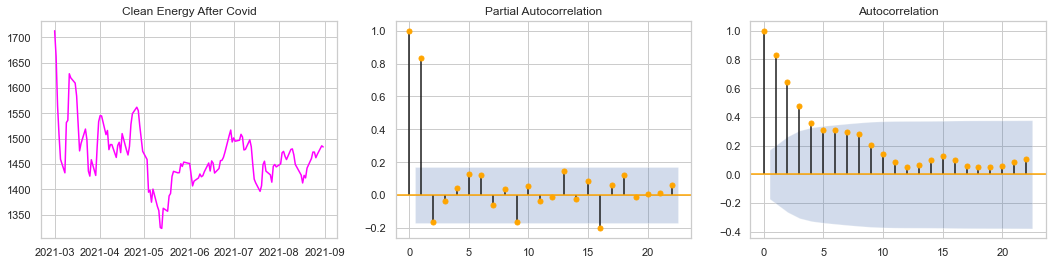

In [14]:
sns.set(rc={'figure.figsize':(18, 4)})
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3)
axes[0].plot(clean_energy_after.Index, color="magenta") 
axes[0].set_title('Clean Energy After Covid')
# axes[1].set(xlim=(-1,100))
plot_pacf(clean_energy_after.Index, ax=axes[1], color="orange")
plot_acf(clean_energy_after.Index, ax=axes[2], color="orange");
# plt.savefig('DS4A/plots/clean_p_acf.jpg');


In [15]:
from statsmodels.tsa.arima.model import ARIMA
model_after = ARIMA(clean_energy_after.Index, order=(1,0,3))
model_after_fit = model_after.fit()
print(model_after_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Index   No. Observations:                  132
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -615.366
Date:                Wed, 20 Oct 2021   AIC                           1242.731
Time:                        22:12:35   BIC                           1260.028
Sample:                    03-01-2021   HQIC                          1249.760
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1477.6297     20.155     73.314      0.000    1438.127    1517.132
ar.L1          0.8010      0.051     15.577      0.000       0.700       0.902
ma.L1          0.3317      0.105      3.166      0.0

/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


After checking the results decided to fit ARIMA(1,0,3) to go with the simpler version

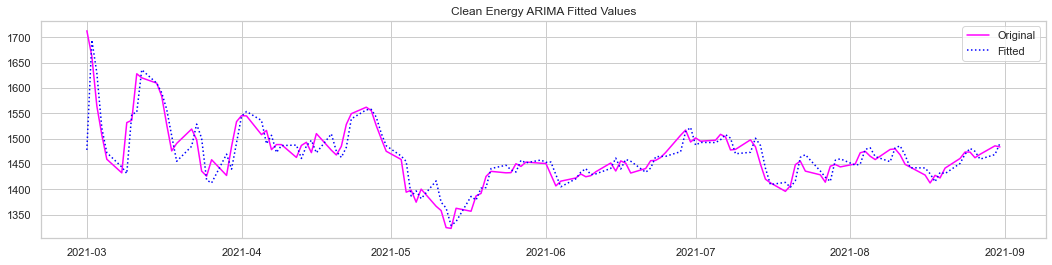

In [16]:
plt.plot(clean_energy_after.Index, color="magenta", label="Original")
plt.plot(model_after_fit.fittedvalues, c="blue", linestyle=":", label="Fitted")
plt.title("Clean Energy ARIMA Fitted Values")
plt.legend()
# plt.savefig('DS4A/plots/clean_fitted.jpg'); 

Text(0.5, 1.0, 'Residuals in the Clean Energy ARIMA Model')

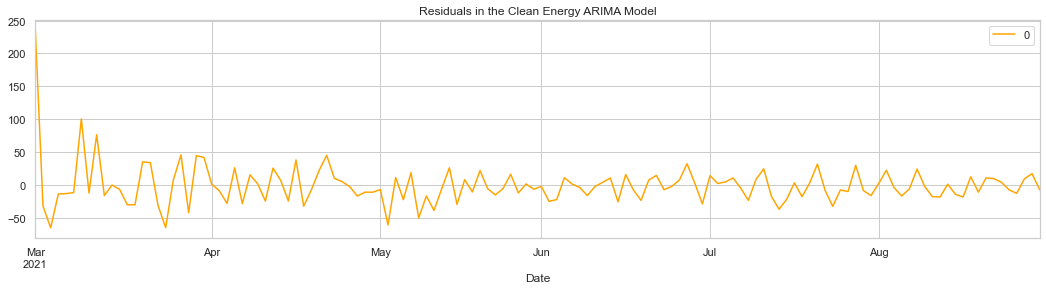

In [17]:
residuals = pd.DataFrame(model_after_fit.resid)
residuals.plot(color="orange")
plt.title("Residuals in the Clean Energy ARIMA Model")
# plt.savefig('DS4A/plots/clean_residual.jpg'); 
# plt.ylim(-50,50)

(-200.0, 200.0)

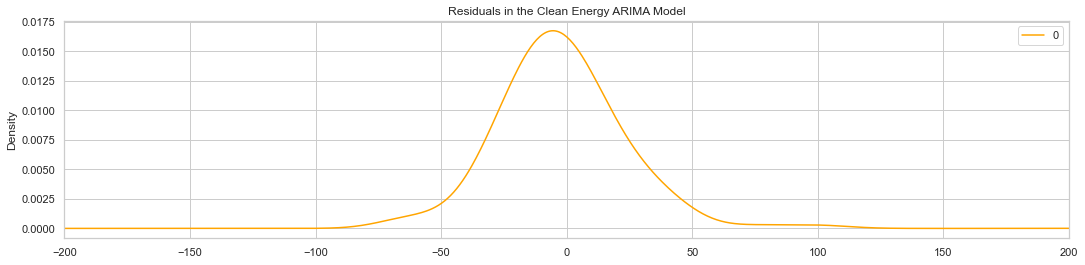

In [18]:
residuals.plot(kind='kde', color="orange")
plt.title("Residuals in the Clean Energy ARIMA Model")
plt.xlim(-200,200)
# plt.savefig('DS4A/plots/clean_residual_kde.jpg'); 


In [19]:
from statsmodels.tsa.arima.model import ARIMA
predictions = list()
history = [x for x in clean_energy_after.Index]
for t in range(len(clean_energy_test)):
    model_after_2 = ARIMA(history, order=(1,0,3))
    model_after_2_fit = model_after_2.fit()
    output = model_after_2_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = clean_energy_test.Index[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1487.146499, expected=1498.290000
predicted=1498.376656, expected=1514.210000
predicted=1514.799835, expected=1502.950000
predicted=1501.308155, expected=1497.680000
predicted=1491.543842, expected=1488.040000
predicted=1481.719800, expected=1460.380000
predicted=1454.933932, expected=1459.620000
predicted=1457.061666, expected=1441.430000
predicted=1441.116918, expected=1461.160000
predicted=1466.525826, expected=1457.470000
predicted=1462.412599, expected=1433.520000
predicted=1433.207698, expected=1423.160000
predicted=1419.255915, expected=1424.500000
predicted=1428.166719, expected=1396.380000
predicted=1401.499113, expected=1410.850000
predicted=1417.065515, expected=1429.320000
predicted=1439.383611, expected=1444.490000
predicted=1457.914119, expected=1418.430000


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
rmse = np.sqrt(mean_squared_error(clean_energy_test.Index, predictions))
mse  = mean_squared_error(clean_energy_test.Index, predictions)
mae  = mean_absolute_error(clean_energy_test.Index, predictions)
mape = mean_absolute_percentage_error(clean_energy_test.Index, predictions)*100
print('Test RMSE: %.2f' % rmse)
print('Test MSE: %.2f' % mse)
print('Test MAE: %.2f' % mae)
print('Test MAPE: ', mape.round(2), "%")

Test RMSE: 17.55
Test MSE: 307.92
Test MAE: 14.38
Test MAPE:  1.0 %


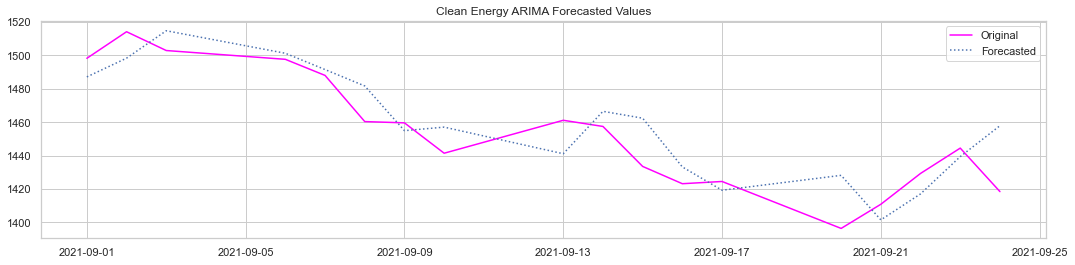

In [65]:
plt.plot(clean_energy_test.Index,color='magenta', label="Original")
plt.plot(clean_energy_test.index,predictions, linestyle=":", label="Forecasted")
plt.title("Clean Energy ARIMA Forecasted Values")
plt.legend()
plt.savefig('DS4A/plots/clean_forecasted.jpg'); 

# ARIMA Model for the regular energy data

In [39]:
energy_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Energy_Index.csv"
energy_index = pd.read_csv(energy_url)
energy_index = energy_index.rename(columns={"Effective date ": "Date", "S&P 500 Energy (Sector)": "Index"})
energy_index["Date"] = pd.to_datetime(energy_index['Date'])
energy_index = energy_index.set_index("Date") 
energy_index.tail()

,Index
Date,
2021-09-20,358.00
2021-09-21,359.34
2021-09-22,370.71
2021-09-23,383.35
2021-09-24,386.57


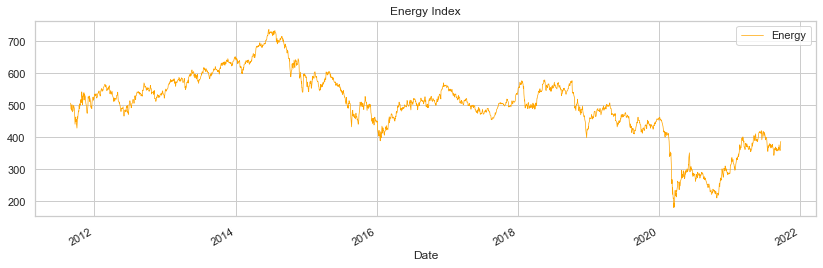

In [44]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
energy_index['Index'].plot(linewidth=0.7, color="orange", label="Energy")
plt.title("Energy Index")
plt.legend()
plt.savefig('plots/regular_all.jpg');

In [45]:
# Until 1 Mar 2020: Before Covid; after 1 Mar 2021 After Covid; after 1 Sep 2021 test data
energy_before = pd.DataFrame(energy_index.loc[:"2020-03-01"])
energy_after = pd.DataFrame(energy_index.loc["2021-03-01":"2021-08-31"])
energy_test = pd.DataFrame(energy_index.loc["2021-09-01":])

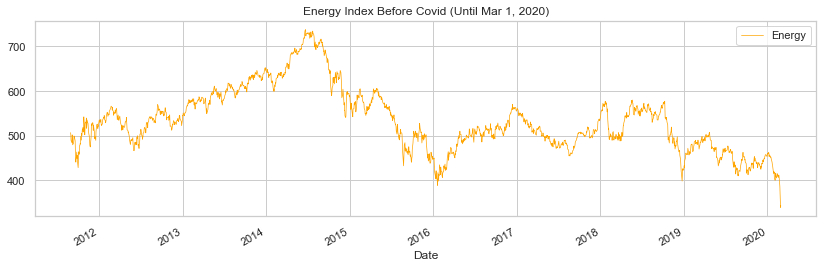

In [46]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
energy_before['Index'].plot(linewidth=0.7, color="orange", label="Energy")
plt.title("Energy Index Before Covid (Until Mar 1, 2020)")
plt.legend()
plt.savefig('plots/regular_before.jpg');

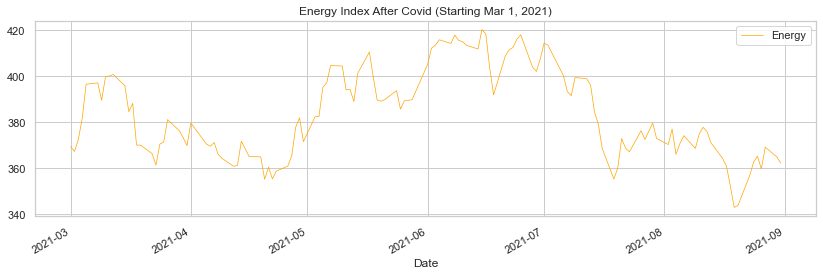

In [49]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
energy_after['Index'].plot(linewidth=0.7, color="orange", label="Energy")
plt.title("Energy Index After Covid (Starting Mar 1, 2021)")
plt.legend()
plt.savefig('plots/regular_after.jpg');

In [50]:
print("Energy mean before COVID: ", round(energy_before["Index"].mean(),2), "Energy mean before COVID: ", round(energy_after["Index"].mean(),2))

Energy mean before COVID:  533.43 Energy mean before COVID:  383.36


In [51]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(energy_after["Index"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#From here we understand no differencing is needed

ADF Statistic: -2.042751
p-value: 0.268148


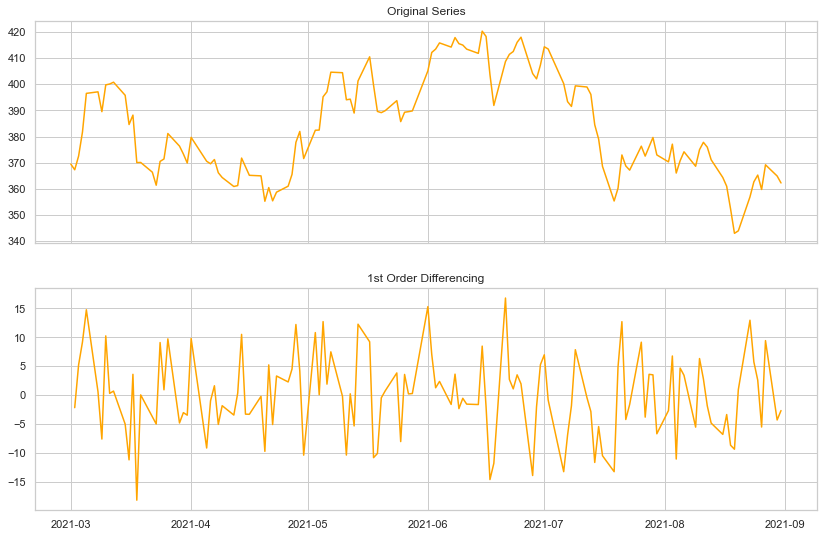

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set(rc={'figure.figsize':(14, 9)})
sns.set_theme(style="whitegrid")
# Original Series
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(energy_after.Index, c="orange"); 
axes[0].set_title('Original Series')
# plot_acf(clean_energy_before.Index, ax=axes[0, 1])

# 1st Differencing
axes[1].plot(energy_after.Index.diff(), color = "orange"); axes[1].set_title('1st Order Differencing')
# plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [55]:
result = adfuller(energy_after.Index.diff()[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.738447
p-value: 0.000000


''

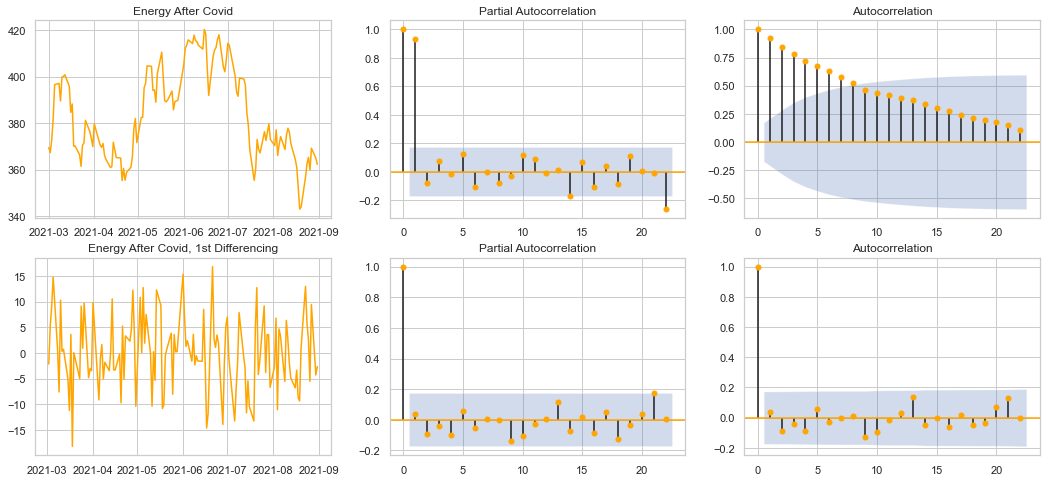

In [62]:
sns.set(rc={'figure.figsize':(18, 8)})
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3)
axes[0,0].plot(energy_after.Index, color="orange") 
axes[0,0].set_title('Energy After Covid')
# axes[1].set(xlim=(-1,100))
plot_pacf(energy_after.Index, ax=axes[0,1], color="orange")
plot_acf(energy_after.Index, ax=axes[0,2], color="orange")

axes[1,0].plot(energy_after.Index.diff()[1:], color="orange") 
axes[1,0].set_title('Energy After Covid, 1st Differencing')
# axes[1].set(xlim=(-1,100))
plot_pacf(energy_after.Index.diff()[1:], ax=axes[1,1], color="orange")
plot_acf(energy_after.Index.diff()[1:], ax=axes[1,2], color="orange");
# plt.savefig('DS4A/plots/clean_p_acf.jpg');


In [63]:
from statsmodels.tsa.arima.model import ARIMA
energy_model = ARIMA(energy_after.Index, order=(0,1,0))
energy_model_fit = energy_model.fit()
print(energy_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Index   No. Observations:                  129
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -432.311
Date:                Thu, 21 Oct 2021   AIC                            866.622
Time:                        14:54:30   BIC                            869.474
Sample:                             0   HQIC                           867.781
                                - 129                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        50.2488      6.886      7.297      0.000      36.752      63.745
Ljung-Box (Q):                       28.32   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.92   Pr

/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [120]:
from statsmodels.tsa.arima.model import ARIMA
energy_model = ARIMA(energy_after.Index, order=(1,0,6))
energy_model_fit = energy_model.fit()
print(energy_model_fit.summary())

/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Index   No. Observations:                  129
Model:                 ARIMA(1, 0, 6)   Log Likelihood                -432.903
Date:                Thu, 21 Oct 2021   AIC                            883.805
Time:                        15:06:46   BIC                            909.543
Sample:                             0   HQIC                           894.263
                                - 129                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.5175      8.822     43.135      0.000     363.228     397.807
ar.L1          0.9258      0.052     17.808      0.000       0.824       1.028
ma.L1          0.0875      0.112      0.778      0.4

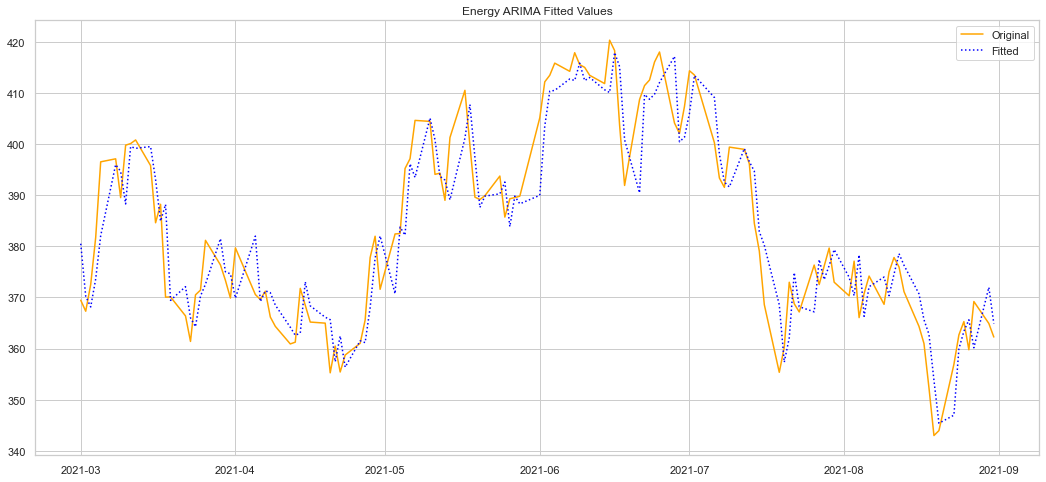

In [121]:
plt.plot(energy_after.Index, color="orange", label="Original")
plt.plot(energy_model_fit.fittedvalues, c="blue", linestyle=":", label="Fitted")
plt.title("Energy ARIMA Fitted Values")
plt.legend()
plt.savefig('plots/regular_fitted.jpg')

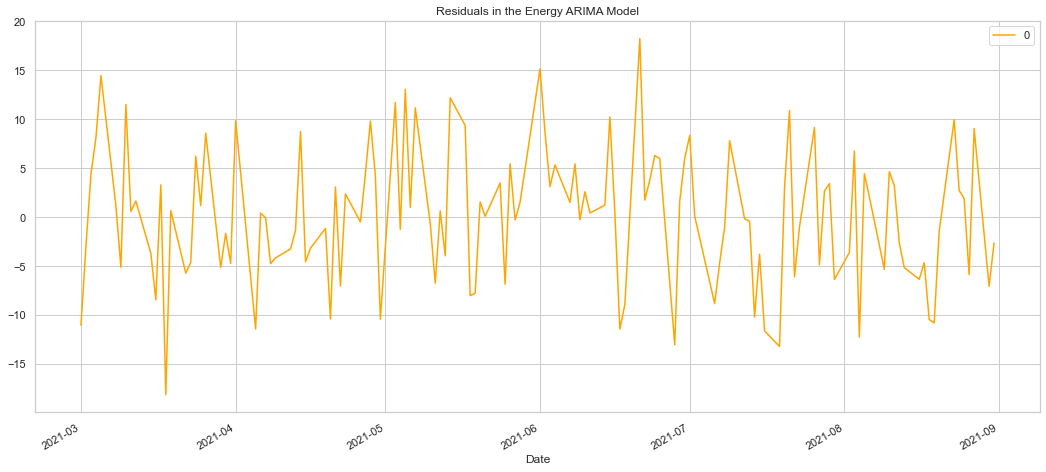

In [122]:
residuals = pd.DataFrame(energy_model_fit.resid)
residuals.plot(color="orange")
plt.title("Residuals in the Energy ARIMA Model")
plt.savefig('plots/regular_residual.jpg'); 
# plt.ylim(-50,50)

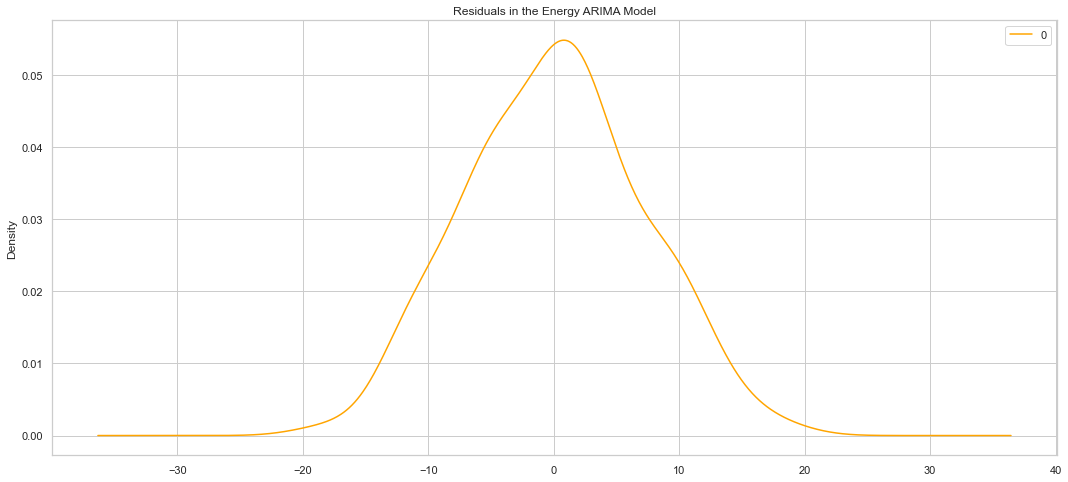

In [123]:
residuals.plot(kind='kde', color="orange")
plt.title("Residuals in the Energy ARIMA Model")
# plt.xlim(-50,50)
plt.savefig('plots/regular_residual_kde.jpg'); 


In [126]:
from statsmodels.tsa.arima.model import ARIMA
reg_predictions = list()
reg_history = [x for x in energy_after.Index]
for t in range(len(energy_test)):
    model_after_3 = ARIMA(reg_history, order=(1,0,6))
    model_after_3_fit = model_after_3.fit()
    output = model_after_3_fit.forecast()
    yhat = output[0]
    reg_predictions.append(yhat)
    obs = energy_test.Index[t]
    reg_history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=364.246515, expected=356.800000
predicted=356.932297, expected=365.820000
predicted=369.169855, expected=363.880000
predicted=363.947385, expected=361.800000
predicted=363.141301, expected=357.110000
predicted=357.723958, expected=357.550000
predicted=360.268017, expected=357.390000
predicted=358.472329, expected=367.900000
predicted=369.504940, expected=362.200000
predicted=362.271330, expected=376.020000
predicted=376.858044, expected=372.040000
predicted=372.231531, expected=369.230000
predicted=370.170489, expected=358.000000
predicted=358.638561, expected=359.340000
predicted=361.715997, expected=370.710000
predicted=372.279233, expected=383.350000
predicted=383.435276, expected=386.570000


In [127]:
reg_rmse = np.sqrt(mean_squared_error(energy_test.Index, reg_predictions))
reg_mse  = mean_squared_error(energy_test.Index, reg_predictions)
reg_mae  = mean_absolute_error(energy_test.Index, reg_predictions)
reg_mape = mean_absolute_percentage_error(energy_test.Index, reg_predictions)*100
print('Test RMSE: %.2f' % reg_rmse)
print('Test MSE: %.2f' % reg_mse)
print('Test MAE: %.2f' % reg_mae)
print('Test MAPE: ', reg_mape.round(2), "%")

Test RMSE: 7.42
Test MSE: 55.12
Test MAE: 6.31
Test MAPE:  1.72 %


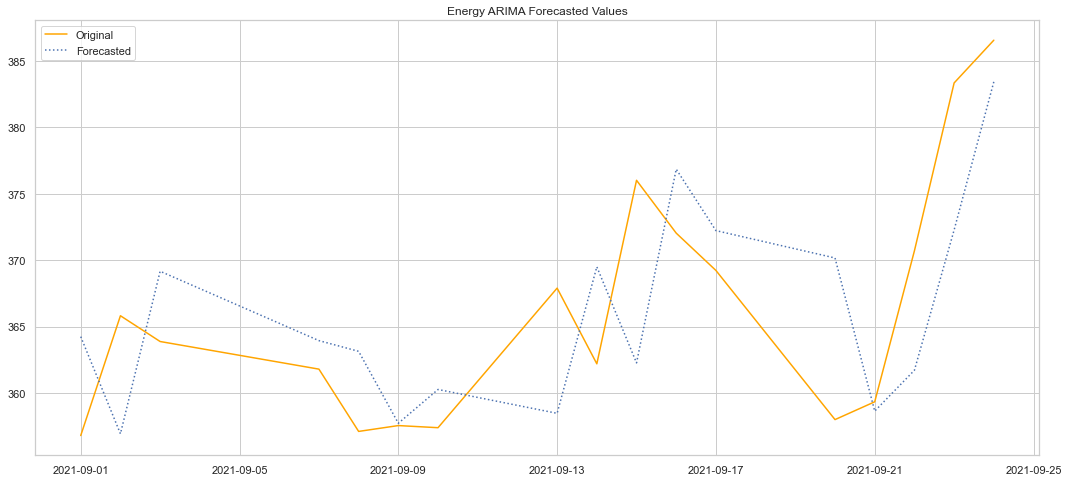

In [128]:
plt.plot(energy_test.Index,color='orange', label="Original")
plt.plot(energy_test.index,reg_predictions, linestyle=":", label="Forecasted")
plt.title("Energy ARIMA Forecasted Values")
plt.legend()
plt.savefig('plots/regular_forecasted.jpg'); 